In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [4]:
ds = xr.open_dataset("/Users/brianpm/Desktop/b.e15.B5505C5WCCML45BGC.cam5_4.1980_2010.001.cam.h0.U.199002-200001.nc", decode_times=False)
ctime = ds['time_bnds'].mean(dim='nbnd')
ctime.attrs = ds['time'].attrs
ds = ds.assign_coords({"time":ctime})
ds = xr.decode_cf(ds)

In [14]:
s = ds['U'].groupby("time.season").mean(dim=('time','lon'))

In [88]:
ds2 = xr.open_dataset("/Users/brianpm/Desktop/b.e15.B5505C5WCCML45BGC.cam5_4.1980_2010.001.cam.h0.U.200002-201001.nc", decode_times=False)
ctime = ds2['time_bnds'].mean(dim='nbnd')
ctime.attrs = ds2['time'].attrs
ds2 = ds2.assign_coords({"time":ctime})
ds2 = xr.decode_cf(ds2)
s2 = ds2['U'].groupby("time.season").mean(dim=('time','lon'))

In [91]:

def season_plot(d1, d2, v):
    """Plot DJF and JJA in colums, either U or T"""

    # set parameters based on variable:
    if v == "T":
        levels = np.arange(130,300,10)
        cmap='magma'
        norm = mpl.colors.Normalize(vmin=130, vmax=300)
        label="T (K)"
    elif v == "U":
        levels = np.arange(-120,121,20)
        cmap='PuOr_r'
        norm = mpl.colors.TwoSlopeNorm(vmin=-120, vcenter=0.0, vmax=120)
        label="U (m/s)"
    # Parameters for difference
    DIFFERENCE = d2-d1
    mxdiff = np.max([0, np.abs(DIFFERENCE).max().item()])
    dcmap = 'coolwarm'
    dnorm = mpl.colors.TwoSlopeNorm(vmin=-1*mxdiff, vcenter=0, vmax=mxdiff)

    glat, glev = np.meshgrid(d1.lat, d1.lev)
    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16,15), constrained_layout=True, sharex=True, sharey=True)
    # since we know exactly what we want, hard code each ax element:
    ax[0,0].contourf(glat,glev,d1.sel(season='DJF'), levels=levels, cmap=cmap, norm=norm)
    ax[0,0].contour(glat,glev,d1.sel(season='DJF'), levels=levels, colors='black')
    ax[0,1].contourf(glat,glev, d1.sel(season='JJA'), levels=levels, cmap=cmap, norm=norm)
    ax[0,1].contour(glat,glev, d1.sel(season='JJA'), levels=levels, colors='black')

    ax[1,0].contourf(glat,glev,d1.sel(season='DJF'), levels=levels, cmap=cmap, norm=norm)
    ax[1,0].contour(glat,glev,d1.sel(season='DJF'), levels=levels, colors='black')
    ax[1,1].contourf(glat,glev, d1.sel(season='JJA'), levels=levels, cmap=cmap, norm=norm)
    ax[1,1].contour(glat,glev, d1.sel(season='JJA'), levels=levels, colors='black')


    ax[2,0].contourf(glat, glev, DIFFERENCE.sel(season='DJF'), levels=11, cmap=dcmap, norm=dnorm)
    ax[2,1].contourf(glat, glev, DIFFERENCE.sel(season='JJA'), levels=11, cmap=dcmap, norm=dnorm)
    
    [a.invert_yaxis() for a in ax.ravel()]
    [a.set_yscale("log") for a in ax.ravel()]
    [a.set_ylim([1000,.01]) for a in ax.ravel()]

    ax[0,0].set_title("DJF", fontsize=18, fontweight='bold')
    ax[0,1].set_title("JJA", fontsize=18, fontweight='bold')
    ax[-1,0].set_xlabel("LATITUDE", fontsize=18, fontweight='bold')
    ax[-1,0].set_ylabel("PRESSURE", fontsize=18, fontweight='bold')
    cax1 = plt.axes([1., 0.37, 0.03, 0.6])
    cb1 = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax1, orientation='vertical', label=label)
    cax2 = plt.axes([1., 0.05, 0.03, 0.27])
    cb2 = fig.colorbar(mpl.cm.ScalarMappable(norm=dnorm, cmap=dcmap), cax=cax2, orientation='vertical', label=label)
    return fig, ax


(<Figure size 1152x1080 with 8 Axes>,
 array([[<AxesSubplot:title={'center':'DJF'}>,
         <AxesSubplot:title={'center':'JJA'}>],
        [<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:xlabel='LATITUDE', ylabel='PRESSURE'>,
         <AxesSubplot:>]], dtype=object))

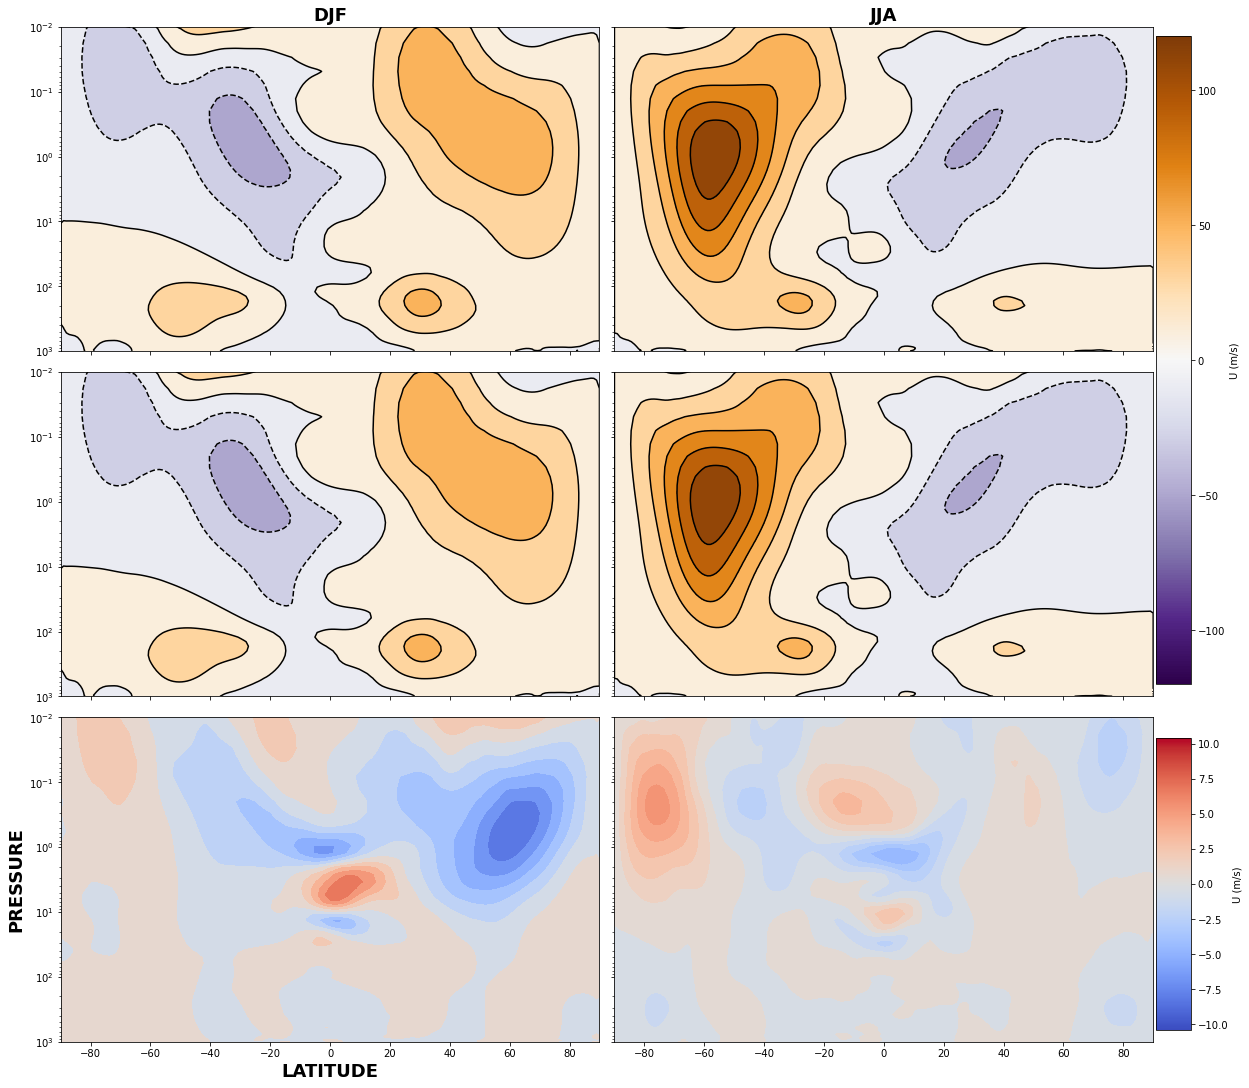

In [92]:
season_plot(s,s2,"U")

In [112]:
def _seasonal_average(darr):
    #Set seasonal ranges:
    seasons = {"ANN": np.arange(1,13,1),
               "DJF": [12, 1, 2],
               "JJA": [6, 7, 8],
               "MAM": [3, 4, 5],
               "SON": [9, 10, 11]}
    savg = dict()

    for s in seasons:
        savg[s] = darr.sel(time=seasons[s]).mean(dim='time')

    c = xr.concat(msd.values(), dim='season')
    c = c.assign_coords({"season":list(seasons.keys())})

    return c

In [ ]:
m = ds['U'].groupby("time.month").mean(dim=('time','lon'))



In [97]:
m = m.rename({"month":"time"})

In [113]:
msd = _seasonal_average(m)

In [114]:
msd.coords

Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lev      (lev) float64 5.96e-06 9.827e-06 1.62e-05 ... 957.5 976.3 992.6
  * season   (season) <U3 'ANN' 'DJF' 'JJA' 'MAM' 'SON'

In [116]:
msd.sel(season='JJA')

<xarray.DataArray 'U' (lev: 70, lat: 192)>
array([[ 0.0000000e+00,  9.2520863e-01,  2.6239622e+00, ...,
        -1.3628367e+01, -6.9508634e+00,  0.0000000e+00],
       [ 0.0000000e+00,  5.0119656e-01,  1.8457237e+00, ...,
        -1.3570022e+01, -6.9083238e+00,  0.0000000e+00],
       [ 0.0000000e+00,  6.8851662e-01,  1.9279871e+00, ...,
        -1.0966160e+01, -5.6062560e+00,  0.0000000e+00],
       ...,
       [ 0.0000000e+00, -1.0867757e+00, -2.1925733e+00, ...,
         2.6187682e-01,  1.8651958e-01, -9.4391680e-06],
       [ 0.0000000e+00, -1.4516325e+00, -2.9621716e+00, ...,
         2.3186171e-01,  1.6675603e-01,  6.9075127e-06],
       [ 0.0000000e+00, -5.6209666e-01, -1.4305882e+00, ...,
         1.7852062e-01,  1.2558120e-01,  2.0120540e-05]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lev      (lev) float64 5.96e-06 9.827e-06 1.62e-05 ... 957.5 976.3 992.6
    season   <U3 'JJA'